In [1]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

# USE FILTER BELOW

In [59]:

df = pd.read_csv(r'C:\Users\Feele\Documents\Sunderland\Data\passesfilter.csv')

In [54]:
df.head()

,Unnamed: 0,id,eventId,minute,second,teamId,x,y,endX,endY,period/value,type/value,type/displayName,outcomeType/value,outcomeType/displayName,playerId,player_num,name
0,11,2277926851,8,0,16.0,16,64.8,21.3,55.8,34.3,1,1,Pass,1,Successful,294849.0,11.0,Gooch
1,25,2277927691,21,0,45.0,16,42.9,31.0,35.4,13.5,1,1,Pass,1,Successful,294849.0,11.0,Gooch
2,27,2277927923,23,0,57.0,16,94.7,5.3,91.3,47.0,1,1,Pass,0,Unsuccessful,294849.0,11.0,Gooch
3,65,2277931635,44,2,56.0,16,70.6,6.7,70.8,33.0,1,1,Pass,0,Unsuccessful,294849.0,11.0,Gooch
4,151,2277943903,87,9,4.0,16,87.9,3.7,92.2,56.7,1,1,Pass,0,Unsuccessful,294849.0,11.0,Gooch


In [55]:
# Use Value_Counts to see what Data we have
df['type/displayName'].value_counts(dropna = False)

Pass    31
Name: type/displayName, dtype: int64

## Plotting and Pitch

In [31]:
# Inflating X and Y to pitch size (statsbomb pitches don't match with WhoScored data)

df['x'] = df['x']*1.2
df['endX'] = df['endX']*1.2
df['y'] = df['y']*.8
df['endY'] = df['endY']*.8

## Pass Map

#### Light Pitch 

Background - #FFFFFF
lines - #B4B6BA

#### Dark Pitch

Background - #1B1B1B
lines - #c7d5cc

#### Blue Pitch (Primary colour)
Background - #0B0725
lines - #B4B6BA

In [72]:
df = pd.read_csv(r'C:\Users\Feele\Documents\Sunderland\Data\Filter.csv')

In [73]:
# Inflating X and Y to pitch size (statsbomb pitches don't match with WhoScored data)

df['x'] = df['x']*1.2
df['endX'] = df['endX']*1.2
df['y'] = df['y']*.8
df['endY'] = df['endY']*.8

In [74]:
#plot arrows
def pass_line_template(ax, x, y, end_x, end_y, line_color):
    ax.annotate('', xy=(80-.8*end_y, 1.2*end_x), xytext=(80-.8*y, 1.2*x), zorder=1,
    arrowprops=dict(arrowstyle='->', linewidth=2.5, color='black', alpha=.75))

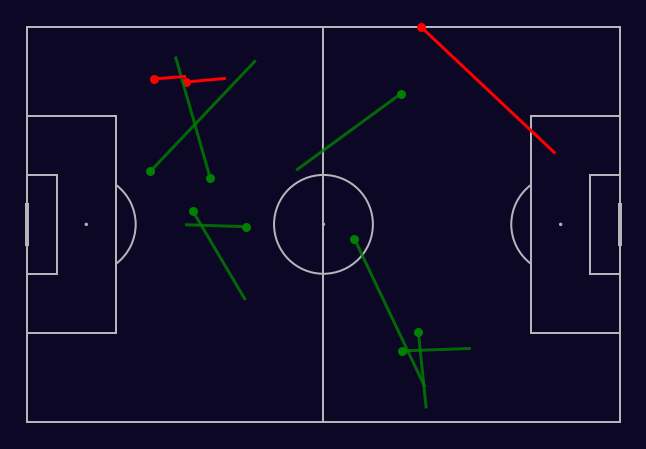

In [75]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#0B0725')
ax.patch.set_facecolor('#0B0725')


pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#0B0725', line_color='#B4B6BA', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

#use a for loop to plot each pass

for x in range(len(df['x'])):
    if df['outcomeType/displayName'][x] == 'Successful':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='green',alpha =.8,linewidth=3,linestyle='solid')
        plt.scatter(df['x'][x],df['y'][x],color='green',marker='o', linewidth=3)
        
for x in range(len(df['x'])):
    if df['outcomeType/displayName'][x] == 'Unsuccessful':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='red',alpha =1,linewidth=3,linestyle='solid')
        plt.scatter(df['x'][x],df['y'][x],color='red',marker='o', linewidth=3)
        
plt.savefig('test.png',dpi=500,bbox_inches = 'tight') 
        